## <div style="text-align: center;">Predicting Used Car Prices: An Analysis of US Market Data</div>

<style>
    div {
        background-color: #f2f2f2;
        padding: 10px;
        border: 1px solid #ccc;
    }
    h2 {
        color: #333;
        font-size: 24px;
    }
</style>


 https://www.kaggle.com/datasets/andreinovikov/used-cars-dataset

### <span style="color: red;"> Our goal is to create a prediction model for used car prices. However, we are facing some limitations in our analysis. Specifically, the variable 'price_drop' lacks information on how the reduction in price from the initial amount was calculated. Additionally, the dataframe only covers data from a single day in March..</span>

## Overview
The goal of this project is to develop a predictive model for estimating the prices of used cars in the USA. We will be using a dataset containing information on 762,091 used cars scraped from cars.com. The data was collected in April 2023, ensuring its relevance and accuracy.

By analyzing the various attributes of the used cars, such as make, model, year, mileage, fuel type, and more, we aim to understand the factors that influence the pricing. Our objective is to build a robust machine learning model that can accurately predict the price of a used car based on these attributes.

Throughout the project, we will employ data analysis techniques, including data cleaning, feature engineering, and exploratory data analysis (EDA). This will help us uncover patterns, relationships, and key features that significantly impact the price of used cars.

Once the data is prepared, we will train and evaluate our predictive model using machine learning algorithms such as regression models. We will split the dataset into training and testing sets to assess the model's performance. Our goal is to create a reliable model that can provide accurate price estimates for used cars.

It's important to note that the dataset covers a specific duration, limited to April 2023, and that the used car market is influenced by various factors beyond the dataset's scope, such as economic conditions and technological advancements. Therefore, the model's predictions should be interpreted within the context of the specific timeframe.

By the end of this project, we aim to provide valuable insights and a predictive model that can assist both buyers and sellers in making informed decisions regarding used car prices.

In [1]:
# Tool kits 
import pandas as pd
import numpy as np

In [2]:
#Load the data frame
used_car = pd.read_csv('cars.csv')

Lets's inspect how big is the dataset.

In [3]:
# Obtain the size of data
print('The size of the data is ' + str(used_car.shape))

The size of the data is (762091, 20)


In [4]:
used_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762091 entries, 0 to 762090
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   manufacturer         762091 non-null  object 
 1   model                762091 non-null  object 
 2   year                 762091 non-null  int64  
 3   mileage              761585 non-null  float64
 4   engine               747041 non-null  object 
 5   transmission         752187 non-null  object 
 6   drivetrain           740529 non-null  object 
 7   fuel_type            739164 non-null  object 
 8   mpg                  620020 non-null  object 
 9   exterior_color       753232 non-null  object 
 10  interior_color       705116 non-null  object 
 11  accidents_or_damage  737879 non-null  float64
 12  one_owner            730608 non-null  float64
 13  personal_use_only    737239 non-null  float64
 14  seller_name          753498 non-null  object 
 15  seller_rating    

There are 762091 instances and 20 columns in the dataset. We will now check for missing values in this dataset.

First, we are going to inspect the percentage of total missing data in this dataset.

In [5]:
# Calculate the total number of missing values in the DataFrame
total_missing = used_car.isnull().sum().sum()

# Calculate the total number of cells in the DataFrame
total_cells = used_car.size

# Calculate the percentage of missing values
missing_percentage = (total_missing / total_cells) * 100

# Display the percentage
print(f"Percentage of missing values: {missing_percentage:.2f}%")

Percentage of missing values: 6.33%


Although the overall percentage of missing data is low, the percentage of missing data may vary across columns. We specifically need to ensure the safe storage of our target variable.

In [6]:
# Inspect the quantity of missing data in each characters.
print(str(used_car.isnull().sum()))

total_missing_values = used_car.isnull().sum().sum()
print('The total of missing data: ' + str(total_missing_values))

manufacturer                0
model                       0
year                        0
mileage                   506
engine                  15050
transmission             9904
drivetrain              21562
fuel_type               22927
mpg                    142071
exterior_color           8859
interior_color          56975
accidents_or_damage     24212
one_owner               31483
personal_use_only       24852
seller_name              8593
seller_rating          213973
driver_rating           31632
driver_reviews_num          0
price_drop             351979
price                       0
dtype: int64
The total of missing data: 964578


This dataset has a large amount of missing data, particularly in variable 'price_drop'. 

.
.
.
Here are the results. The following character fields have missing values:
- Mileage: 506
- Engine: 15050
- Transmission: 9904
- Drivetrain: 21562
- Fuel Type: 22927
- MPG: 142071
- Exterior Color: 8859
- Interior Color: 56975
- Accidents or Damage: 24212
- One Owner: 31483
- Personal Use Only: 24852
- Seller Name: 8593
- Seller Rating: 213973
- Driver Rating: 31632
- Price Drop: 351979

In [7]:
# overview of percentage of missing data.
percent_missing = used_car.isnull().sum() * 100 / len(used_car)
missing_value_used_car = pd.DataFrame({'column_name': used_car.columns,
                                 'percent_missing': percent_missing})

missing_value_used_car.sort_values('percent_missing', inplace=True)

print(missing_value_used_car)

                             column_name  percent_missing
manufacturer                manufacturer         0.000000
driver_reviews_num    driver_reviews_num         0.000000
price                              price         0.000000
model                              model         0.000000
year                                year         0.000000
mileage                          mileage         0.066396
seller_name                  seller_name         1.127556
exterior_color            exterior_color         1.162460
transmission                transmission         1.299582
engine                            engine         1.974830
drivetrain                    drivetrain         2.829321
fuel_type                      fuel_type         3.008433
accidents_or_damage  accidents_or_damage         3.177048
personal_use_only      personal_use_only         3.261028
one_owner                      one_owner         4.131134
driver_rating              driver_rating         4.150685
interior_color

After analyzing the data, we found that the 'price_drop' category has a significant amount of missing information, with nearly half of the data being absent. This creates a hurdle in accomplishing our objective. Despite our attempts to locate a dependable dataset, we were unsuccessful. Therefore, we must acknowledge that we cannot achieve our goal at this moment.

### <span style="color: red;"> We need to discuss this as the absence of values may indicate no price change.</span>

---------

From now on, we will focus solely on learning how to clean and visualize data.

# Data Cleaning and Preprocessing

We will fill in missing information for various data fields such as 'exterior_color', 'seller_name', 'transmission', 'engine', 'drivetrain', 'fuel_type', 'accidents_or_damage', 'personal_use_only', 'one_owner', 'driver_rating', 'interior_color', and 'seller_rating' with 'Unknown'. In the case of 'mpg', we will use '0' to indicate defects, no records, or lack of safety checks. For 'price_drop', we will use also 0 as 'no_change' to fill in any gaps. To fill in the missing data, we will use the MICE method and impute the average value since the percentage of missing data is low.

In [8]:
# List of columns to fill
columns_to_fill = ['exterior_color', 'seller_name', 'transmission', 'engine', 'drivetrain', 'fuel_type', 'accidents_or_damage', 'personal_use_only', 'one_owner', 'driver_rating', 'interior_color', 'seller_rating']

# Fill missing values with 'Unknown'
used_car[columns_to_fill] = used_car[columns_to_fill].fillna('Unknown')

# Fill missing values in 'mpg' and 'price_drop' columns
used_car['mpg'] = used_car['mpg'].fillna(0)
used_car['price_drop'] = used_car['price_drop'].fillna(0)

# Display the total count of missing values in each column
print(used_car.isnull().sum())


manufacturer             0
model                    0
year                     0
mileage                506
engine                   0
transmission             0
drivetrain               0
fuel_type                0
mpg                      0
exterior_color           0
interior_color           0
accidents_or_damage      0
one_owner                0
personal_use_only        0
seller_name              0
seller_rating            0
driver_rating            0
driver_reviews_num       0
price_drop               0
price                    0
dtype: int64


In [9]:
from sklearn.impute import SimpleImputer

# Calculate the mean
mean_mileage = used_car['mileage'].mean()

# Initialize SimpleImputer with mean strategy
imputer = SimpleImputer(strategy='mean')

# Impute missing values in the 'mileage' column
used_car['mileage'] = imputer.fit_transform(used_car[['mileage']])

# Verify if all missing values are imputed
print(used_car.isnull().sum())


manufacturer           0
model                  0
year                   0
mileage                0
engine                 0
transmission           0
drivetrain             0
fuel_type              0
mpg                    0
exterior_color         0
interior_color         0
accidents_or_damage    0
one_owner              0
personal_use_only      0
seller_name            0
seller_rating          0
driver_rating          0
driver_reviews_num     0
price_drop             0
price                  0
dtype: int64


In [10]:
used_car.head()

,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,interior_color,accidents_or_damage,one_owner,personal_use_only,seller_name,seller_rating,driver_rating,driver_reviews_num,price_drop,price
0,Acura,ILX Hybrid 1.5L,2013,92945.0,"1.5L I-4 i-VTEC variable valve control, engine...",Automatic,Front-wheel Drive,Gasoline,39-38,Black,Parchment,0.0,0.0,0.0,Iconic Coach,Unknown,4.4,12.0,300.0,13988.0
1,Acura,ILX Hybrid 1.5L,2013,47645.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,Front-wheel Drive,Hybrid,39-38,Gray,Ebony,1.0,1.0,1.0,Kars Today,Unknown,4.4,12.0,0.0,17995.0
2,Acura,ILX Hybrid 1.5L,2013,53422.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,Front-wheel Drive,Hybrid,39-38,Bellanova White Pearl,Ebony,0.0,1.0,1.0,Weiss Toyota of South County,4.3,4.4,12.0,500.0,17000.0
3,Acura,ILX Hybrid 1.5L,2013,117598.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,Front-wheel Drive,Hybrid,39-38,Polished Metal Metallic,Unknown,0.0,1.0,1.0,Apple Tree Acura,Unknown,4.4,12.0,675.0,14958.0
4,Acura,ILX Hybrid 1.5L,2013,114865.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,Front-wheel Drive,Hybrid,39-38,Unknown,Ebony,1.0,0.0,1.0,Herb Connolly Chevrolet,3.7,4.4,12.0,300.0,14498.0


Let's review the characters in this dataset.

In [11]:
used_car.columns

Index(['manufacturer', 'model', 'year', 'mileage', 'engine', 'transmission',
       'drivetrain', 'fuel_type', 'mpg', 'exterior_color', 'interior_color',
       'accidents_or_damage', 'one_owner', 'personal_use_only', 'seller_name',
       'seller_rating', 'driver_rating', 'driver_reviews_num', 'price_drop',
       'price'],
      dtype='object')

As we know, there are 20 characters presented above. Now we will identify which columns contain numerical and categorical data.

The data provider, Andrei Novikov, has provided a description that explains the meaning of each column in detail. These are as follows:
- Manufacturer: This refers to the name of the car manufacturer.
- Model: This refers to the name of the car model.
- Year: This refers to the year when the car was produced.
- Mileage: This refers to the number of miles that the car has traveled since production.
- Engine: This refers to the car engine.
- Transmission: This refers to the type of the car's transmission.
- Drivetrain: This refers to the type of the car's drivetrain.
- Fuel Type: This refers to the type of fuel that the car consumes.
- MPG: This refers to the number of miles that a car can travel using one gallon of fuel (miles per gallon).
- Exterior Color: This refers to the car's exterior color.
- Interior Color: This refers to the car's interior color.
- Accidents or Damage: This refers to whether the car was involved in accidents.
- One Owner: This refers to whether the car was owned by one person.
- Personal Use Only: This refers to whether the car was used only for personal purposes.
- Seller Name: This refers to the name of the seller.
- Seller Rating: This refers to the seller's rating.
- Driver Rating: This refers to the car rating given by drivers.
- Driver Reviews Number: This refers to the number of car reviews left by drivers.
- Price Drop: This refers to the price reduction from the initial price.
- Price: This refers to the car price.

In [12]:
used_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762091 entries, 0 to 762090
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   manufacturer         762091 non-null  object 
 1   model                762091 non-null  object 
 2   year                 762091 non-null  int64  
 3   mileage              762091 non-null  float64
 4   engine               762091 non-null  object 
 5   transmission         762091 non-null  object 
 6   drivetrain           762091 non-null  object 
 7   fuel_type            762091 non-null  object 
 8   mpg                  762091 non-null  object 
 9   exterior_color       762091 non-null  object 
 10  interior_color       762091 non-null  object 
 11  accidents_or_damage  762091 non-null  object 
 12  one_owner            762091 non-null  object 
 13  personal_use_only    762091 non-null  object 
 14  seller_name          762091 non-null  object 
 15  seller_rating    

In [13]:
# select numeric columns 
numeric = list(used_car.select_dtypes(include=[np.number]).columns.values)
print('These columns are stored as numerical input: '+ str(numeric))

These columns are stored as numerical input: ['year', 'mileage', 'driver_reviews_num', 'price_drop', 'price']


In [14]:
# select non-numeric columns
columns_object = list(used_car.select_dtypes(exclude=[np.number]).columns.values)
print('These columns are stored as series of object: '+ str(columns_object))

These columns are stored as series of object: ['manufacturer', 'model', 'engine', 'transmission', 'drivetrain', 'fuel_type', 'mpg', 'exterior_color', 'interior_color', 'accidents_or_damage', 'one_owner', 'personal_use_only', 'seller_name', 'seller_rating', 'driver_rating']




| Numerical Data | Categorical Data |
|----------------|------------------|
| 'year' (int)           | 'manufacturer'      |
| 'mileage'            | 'model'       |
| 'accidents_or_damage' | 'engine'       |
| 'one_owner'  |  'transmission' |
| 'personal_use_only'  |  'drivetrain'|
| 'seller_rating'  |  'fuel_type'|
| 'driver_rating'  |   'mpg'|
| 'driver_reviews_num'  |  'exterior_color'|
| 'price_drop'  |  'interior_color'|
| 'price'  |  'seller_name'|

Regardless of how the data is stored, certain characters need to be treated differently. For example, the variable 'year' is technically continuous numerical data, but in the context of this analysis, it should be treated as categorical since it represents a property of the car.

In [15]:
used_car.head(100)

,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,interior_color,accidents_or_damage,one_owner,personal_use_only,seller_name,seller_rating,driver_rating,driver_reviews_num,price_drop,price
0,Acura,ILX Hybrid 1.5L,2013,92945.0,"1.5L I-4 i-VTEC variable valve control, engine...",Automatic,Front-wheel Drive,Gasoline,39-38,Black,Parchment,0.0,0.0,0.0,Iconic Coach,Unknown,4.4,12.0,300.0,13988.0
1,Acura,ILX Hybrid 1.5L,2013,47645.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,Front-wheel Drive,Hybrid,39-38,Gray,Ebony,1.0,1.0,1.0,Kars Today,Unknown,4.4,12.0,0.0,17995.0
2,Acura,ILX Hybrid 1.5L,2013,53422.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,Front-wheel Drive,Hybrid,39-38,Bellanova White Pearl,Ebony,0.0,1.0,1.0,Weiss Toyota of South County,4.3,4.4,12.0,500.0,17000.0
3,Acura,ILX Hybrid 1.5L,2013,117598.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,Front-wheel Drive,Hybrid,39-38,Polished Metal Metallic,Unknown,0.0,1.0,1.0,Apple Tree Acura,Unknown,4.4,12.0,675.0,14958.0
4,Acura,ILX Hybrid 1.5L,2013,114865.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,Front-wheel Drive,Hybrid,39-38,Unknown,Ebony,1.0,0.0,1.0,Herb Connolly Chevrolet,3.7,4.4,12.0,300.0,14498.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Acura,ZDX Base,2010,97400.0,300.0HP 3.7L V6 Cylinder Engine Gasoline Fuel,6-Speed A/T,All-wheel Drive,Gasoline,0,Gray,Gray,Unknown,Unknown,Unknown,Unknown,Unknown,4.7,14.0,0.0,16500.0
96,Acura,ZDX Base,2012,0.0,3.7L V6 24V MPFI SOHC,6-Speed Automatic,All-wheel Drive,Gasoline,16-23,Crystal Black Pearl,Ebony,0.0,0.0,1.0,Genesis of Downers Grove,Unknown,4.7,4.0,0.0,22490.0
97,Acura,ILX 2.0L,2014,134399.0,2.0L I4 16V MPFI SOHC,5-Speed Automatic,Front-wheel Drive,Gasoline,24-35,Black,Ebony,0.0,0.0,1.0,United Auto Sales,Unknown,4.7,32.0,0.0,13995.0
98,Acura,ILX Premium Package,2019,40948.0,2.4L I4 16V GDI DOHC,8-Speed Automatic with Auto-Shift,Front-wheel Drive,Gasoline,24-34,Performance Red Pearl,Ebony,0.0,0.0,1.0,Off Lease Only Miami,5.0,4.7,26.0,400.0,21399.0


According to our dataframe, 'year' and 'accidents_or_damage', 'one_owner', 'personal_use_only', 'seller_rating', 'driver_rating' ought to be considered categorical variables as they denote particular conditions of the car. On the other hand, 'mpg' should be regarded as numerical data since we cannot assume a single digit to represent the car accurately. Moreover, the assessment of whether a car has run a lot or not can vary depending on individual perspectives. Therefore, we will treat 'mpg' as solely continuous numerical data.

| Numerical Data | Categorical Data |
|----------------|------------------|
|  'price'               | 'manufacturer'      |
|  'price_drop'     | 'model'       |
|   'mileage'             | 'engine'       |
|  'driver_reviews_num'              |  'transmission' |
|  'mpg'              |  'drivetrain'|
|                |  'fuel_type'|
|                |  'exterior_color'|
|                |  'interior_color'|
|                |  'seller_name'|
|                |               |
|                |  'driver_rating'|
|                | 'seller_rating'|
|                | 'personal_use_only'|
|                |  'one_owner'|
|                |  'accidents_or_damage'|
|                |  'year'  |

In [16]:
#Prepare the columns for conversion into the appropriate data type.

The data saved in 'mgp' appears to be difficult for us to comprehend as we typically measure fuel consumption in Km per Liter. Therefore, we need to convert mpg to kpl. It's important to consider that a vehicle's fuel consumption may vary based on driving conditions, and the data we have includes a range of fuel consumption values. To simplify things, we will use the mean of the fuel consumption as our data. (kpl).

In [17]:
used_car.mpg.unique()

array(['39-38', 0, '19-24', '21-22', '17-24', '21-0', '22-22', '0-0',
       '18-24', '16-23', '24-35', '24-34', '25-35', '25-36', '22-31',
       '35-35', '0-34', '25-0', '24-0', '27-28', '24-33', '27-34',
       '25-34', '25-31', '27-33', '24-30', '24-31', '23-31', '27-31',
       '18-25', '18-26', '26-27', '28-32', '28-29', '29-36', '26-36',
       '30-37', '25-29', '20-31', '20-29', '20-30', '20-0', '17-25',
       '19-28', '26-26', '19-29', '20-28', '18-0', '17-26', '19-26',
       '18-27', '18-29', '25-25', '20-26', '20-25', '27-27', '19-27',
       '21-27', '22-28', '21-26', '17-22', '22-27', '19-23', '19-22',
       '21', '19-0', '28-28', '17-0', '24-24', '21-29', '21-30', '22-30',
       '31-31', '22-31.0', '21-31', '23-33', '21-34', '23-32', '20-32',
       '19-25', '23', '34-34', '23-0', '20-34', '16-24', '16-22', '16-21',
       '20-27', '15-20', '21-21', '17-23', '17-21', '16-0', '17-20',
       '18-23', '15-21', '13-18', '14-22', '13-20', '14-23', '13-19',
       '12-19',

In [18]:
# Replace the 'mpg' column values with single values
used_car.mpg = used_car['mpg'].apply(lambda x: (float(x.split('-')[0]) + float(x.split('-')[1])) / 2 if '-' in str(x) else float(x))

# Display the updated 'mpg' column
print(used_car.mpg.unique())

[ 38.5    0.    21.5   20.5   10.5   22.    21.    19.5   29.5   29.
  30.    30.5   26.5   35.    17.    12.5   12.    27.5   28.5   28.
  27.    32.5   31.    33.5   25.5   24.5   25.    10.    23.5   26.
  24.     9.    22.5   23.     9.5    8.5   34.    11.5   20.    19.
  18.5   17.5    8.    18.    15.5   16.5   16.     6.5   32.    31.5
  36.    37.    77.    77.5   13.5    6.    94.5   86.    11.     7.5
   7.    15.    14.    14.5   76.    13.    72.    69.    33.    56.
   5.    26.25  34.5   35.5   38.     5.5   42.5   71.    37.5   41.
  39.    36.5   39.5   24.25 127.5   15.75  14.55  13.95  40.    39.4
  43.    21.25  66.    42.    43.5   41.5   81.    60.5   34.25  24.95
  27.25  40.5   26.75  25.25  18.3    4.5   47.5   47.    48.    52.
  45.5   44.    50.    47.75  32.8   58.    54.5   55.    59.    55.5
  30.25  32.25  32.75  50.5   24.75  23.25  18.25  17.75  20.6   19.7
  22.25  48.5   22.75  23.05  31.75  21.75  58.5   28.25  19.25  12.05
  28.75  33.25  73.5   54

In [19]:
# Convert mpg to kpl
used_car['mpg'] = used_car['mpg'] * 0.4251437075

# Rename the column 'mpg' to 'kpl'
used_car.rename(columns={'mpg': 'kpl'}, inplace=True)

# Display the updated column names
print(used_car.columns)

# Display the updated 'mpg' column with kpl values
print(used_car.kpl.unique())

Index(['manufacturer', 'model', 'year', 'mileage', 'engine', 'transmission',
       'drivetrain', 'fuel_type', 'kpl', 'exterior_color', 'interior_color',
       'accidents_or_damage', 'one_owner', 'personal_use_only', 'seller_name',
       'seller_rating', 'driver_rating', 'driver_reviews_num', 'price_drop',
       'price'],
      dtype='object')
[16.36803274  0.          9.14058971  8.715446    4.46400893  9.35316157
  8.92801786  8.2903023  12.54173937 12.32916752 12.75431123 12.96688308
 11.26630825 14.88002976  7.22744303  5.31429634  5.10172449 11.69145196
 12.11659566 11.90402381 11.4788801  13.81717049 13.17945493 14.2423142
 10.84116454 10.41602083 10.62859269  4.25143708  9.99087713 11.0537364
 10.20344898  3.82629337  9.56573342  9.77830527  4.03886522  3.61372151
 14.45488606  4.88915264  8.50287415  8.07773044  7.86515859  7.44001488
  3.40114966  7.65258674  6.58972747  7.01487117  6.80229932  2.7634341
 13.60459864 13.39202679 15.30517347 15.73031718 32.73606548 32.948637

It's unclear why the column is named 'year' when it represents the production year of the car. We will rename it to 'produced_year'.

In [20]:
# Rename the column 'year' to 'produced_year'
used_car.rename(columns={'year': 'produced_year'}, inplace=True)

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
# Set a new dataframe before encoding.
df_encoded = used_car.copy()

# Select the numerical variables
numerical_variables = ['kpl', 'mileage', 'price_drop', 'price']

# Select the categorical variables
categorical_variables = ['seller_rating', 'driver_rating', 'model', 'produced_year', 'manufacturer', 'driver_reviews_num', 'accidents_or_damage', 'personal_use_only', 'engine', 'transmission', 'fuel_type', 'exterior_color', 'interior_color', 'one_owner', 'seller_name']

# Convert categorical variables to strings
df_encoded[categorical_variables] = df_encoded[categorical_variables].astype(str)

# Encode the categorical variables
label_encoder = LabelEncoder()
encoded_categorical = df_encoded[categorical_variables].apply(label_encoder.fit_transform)

# Concatenate the numerical and encoded categorical variables
encoded_data = pd.concat([df_encoded[numerical_variables], encoded_categorical], axis=1)

In [23]:
print(df_encoded.dtypes)

manufacturer            object
model                   object
produced_year           object
mileage                float64
engine                  object
transmission            object
drivetrain              object
fuel_type               object
kpl                    float64
exterior_color          object
interior_color          object
accidents_or_damage     object
one_owner               object
personal_use_only       object
seller_name             object
seller_rating           object
driver_rating           object
driver_reviews_num      object
price_drop             float64
price                  float64
dtype: object


# Feature Engineering

In [24]:
df_encoded.head(5)

,manufacturer,model,produced_year,mileage,engine,transmission,drivetrain,fuel_type,kpl,exterior_color,interior_color,accidents_or_damage,one_owner,personal_use_only,seller_name,seller_rating,driver_rating,driver_reviews_num,price_drop,price
0,Acura,ILX Hybrid 1.5L,2013,92945.0,"1.5L I-4 i-VTEC variable valve control, engine...",Automatic,Front-wheel Drive,Gasoline,16.368033,Black,Parchment,0.0,0.0,0.0,Iconic Coach,Unknown,4.4,12.0,300.0,13988.0
1,Acura,ILX Hybrid 1.5L,2013,47645.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,Front-wheel Drive,Hybrid,16.368033,Gray,Ebony,1.0,1.0,1.0,Kars Today,Unknown,4.4,12.0,0.0,17995.0
2,Acura,ILX Hybrid 1.5L,2013,53422.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,Front-wheel Drive,Hybrid,16.368033,Bellanova White Pearl,Ebony,0.0,1.0,1.0,Weiss Toyota of South County,4.3,4.4,12.0,500.0,17000.0
3,Acura,ILX Hybrid 1.5L,2013,117598.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,Front-wheel Drive,Hybrid,16.368033,Polished Metal Metallic,Unknown,0.0,1.0,1.0,Apple Tree Acura,Unknown,4.4,12.0,675.0,14958.0
4,Acura,ILX Hybrid 1.5L,2013,114865.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,Front-wheel Drive,Hybrid,16.368033,Unknown,Ebony,1.0,0.0,1.0,Herb Connolly Chevrolet,3.7,4.4,12.0,300.0,14498.0


In [25]:
df_encoded.describe()

,mileage,kpl,price_drop,price
count,7.620910e+05,762091.000000,762091.000000,7.620910e+05
mean,5.578169e+04,8.509226,542.158789,3.648898e+04
std,4.354342e+04,4.778033,1126.886340,1.984183e+06
min,0.000000e+00,0.000000,0.000000,1.000000e+00
25%,2.330200e+04,7.440015,0.000000,1.958300e+04
50%,4.562900e+04,9.565733,170.000000,2.798900e+04
75%,7.833300e+04,11.478880,750.000000,3.948800e+04
max,1.119067e+06,54.205823,170995.000000,1.000000e+09


In [26]:
sorted_unique_years = df_encoded['produced_year'].sort_values().unique()
print(sorted_unique_years)

['1915' '1917' '1919' '1923' '1925' '1926' '1927' '1928' '1929' '1930'
 '1931' '1932' '1934' '1935' '1936' '1937' '1938' '1939' '1940' '1941'
 '1942' '1946' '1947' '1948' '1949' '1950' '1951' '1952' '1953' '1954'
 '1955' '1956' '1957' '1958' '1959' '1960' '1961' '1962' '1963' '1964'
 '1965' '1966' '1967' '1968' '1969' '1970' '1971' '1972' '1973' '1974'
 '1975' '1976' '1977' '1978' '1979' '1980' '1981' '1982' '1983' '1984'
 '1985' '1986' '1987' '1988' '1989' '1990' '1991' '1992' '1993' '1994'
 '1995' '1996' '1997' '1998' '1999' '2000' '2001' '2002' '2003' '2004'
 '2005' '2006' '2007' '2008' '2009' '2010' '2011' '2012' '2013' '2014'
 '2015' '2016' '2017' '2018' '2019' '2020' '2021' '2022' '2023' '2024']


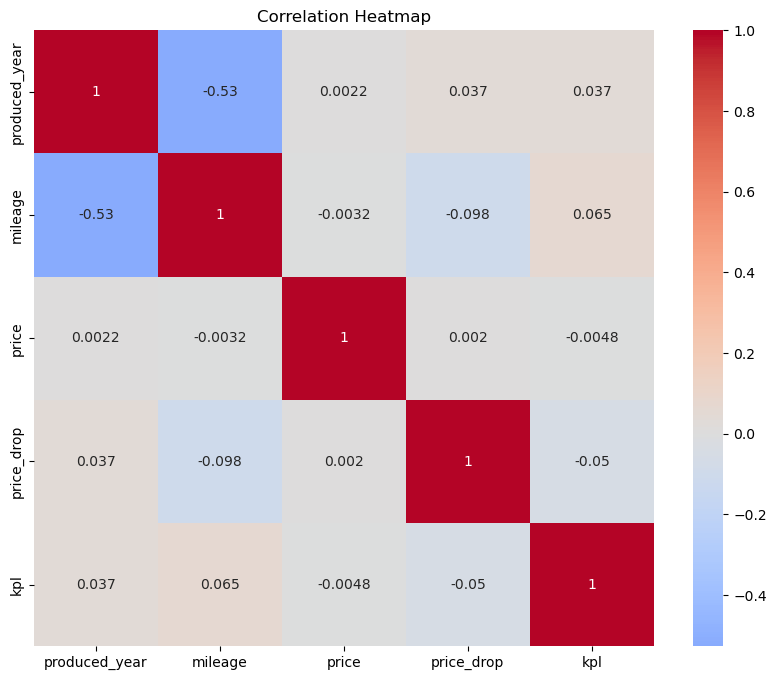

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the numerical columns for the plots
numerical_columns = ['produced_year', 'mileage', 'price','price_drop','kpl']

# Create a correlation matrix for the selected columns
correlation_matrix = used_car[numerical_columns].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap")
plt.show()

In [28]:
# Assuming df_encoded['year'] contains years as strings
df_encoded['age'] =  2023 - df_encoded['produced_year'].astype(int)
df_encoded.age

0         10
1         10
2         10
3         10
4         10
          ..
762086     1
762087    11
762088     9
762089    10
762090     8
Name: age, Length: 762091, dtype: int64

In [29]:
df_encoded['present_price'] = df_encoded['price'] - df_encoded['price_drop']
df_encoded.present_price

0         13688.0
1         17995.0
2         16500.0
3         14283.0
4         14198.0
           ...   
762086    34548.0
762087    12500.0
762088    11999.0
762089     7995.0
762090    12498.0
Name: present_price, Length: 762091, dtype: float64

In [30]:
df_encoded.columns

Index(['manufacturer', 'model', 'produced_year', 'mileage', 'engine',
       'transmission', 'drivetrain', 'fuel_type', 'kpl', 'exterior_color',
       'interior_color', 'accidents_or_damage', 'one_owner',
       'personal_use_only', 'seller_name', 'seller_rating', 'driver_rating',
       'driver_reviews_num', 'price_drop', 'price', 'age', 'present_price'],
      dtype='object')

In [31]:
df_encoded.dtypes

manufacturer            object
model                   object
produced_year           object
mileage                float64
engine                  object
transmission            object
drivetrain              object
fuel_type               object
kpl                    float64
exterior_color          object
interior_color          object
accidents_or_damage     object
one_owner               object
personal_use_only       object
seller_name             object
seller_rating           object
driver_rating           object
driver_reviews_num      object
price_drop             float64
price                  float64
age                      int64
present_price          float64
dtype: object

In [32]:
df_encoded.describe()

,mileage,kpl,price_drop,price,age,present_price
count,7.620910e+05,762091.000000,762091.000000,7.620910e+05,762091.000000,7.620910e+05
mean,5.578169e+04,8.509226,542.158789,3.648898e+04,5.208602,3.594682e+04
std,4.354342e+04,4.778033,1126.886340,1.984183e+06,5.110532,1.984181e+06
min,0.000000e+00,0.000000,0.000000,1.000000e+00,-1.000000,-2.501000e+03
25%,2.330200e+04,7.440015,0.000000,1.958300e+04,2.000000,1.899800e+04
50%,4.562900e+04,9.565733,170.000000,2.798900e+04,4.000000,2.746200e+04
75%,7.833300e+04,11.478880,750.000000,3.948800e+04,7.000000,3.894000e+04
max,1.119067e+06,54.205823,170995.000000,1.000000e+09,108.000000,1.000000e+09


/var/folders/t5/xxcnz_z93wd122r6j3z6vzw00000gn/T/ipykernel_43313/3053066350.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_encoded[numerical_columns].corr()


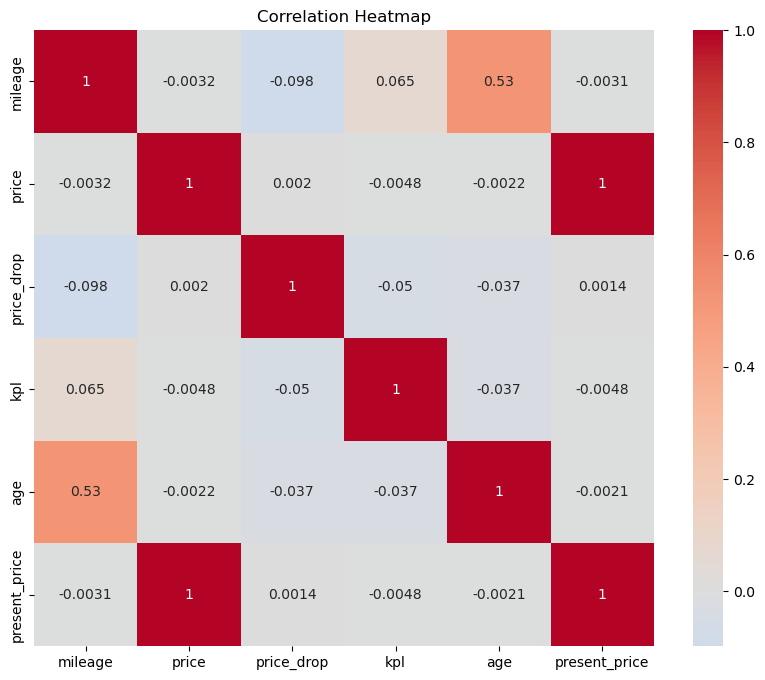

In [33]:
# Select the numerical columns for the plots
numerical_columns = ['produced_year', 'mileage', 'price','price_drop','kpl', 'age', 'present_price']

# Create a correlation matrix for the selected columns
correlation_matrix = df_encoded[numerical_columns].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap")
plt.show()

Let's analyze the correlation by utilizing a scatter plot.
The combinations captivate us are;


- present_price vs 
-               vs kpl
-               vs mielage
-               vs age
-
-
- age vs price_drop
-        vs kpl
-        vs mielage
-        vs age

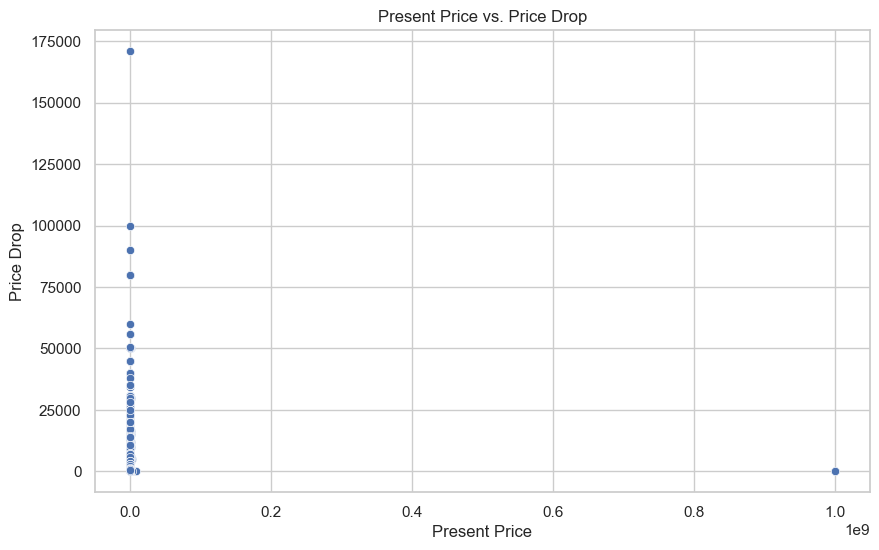

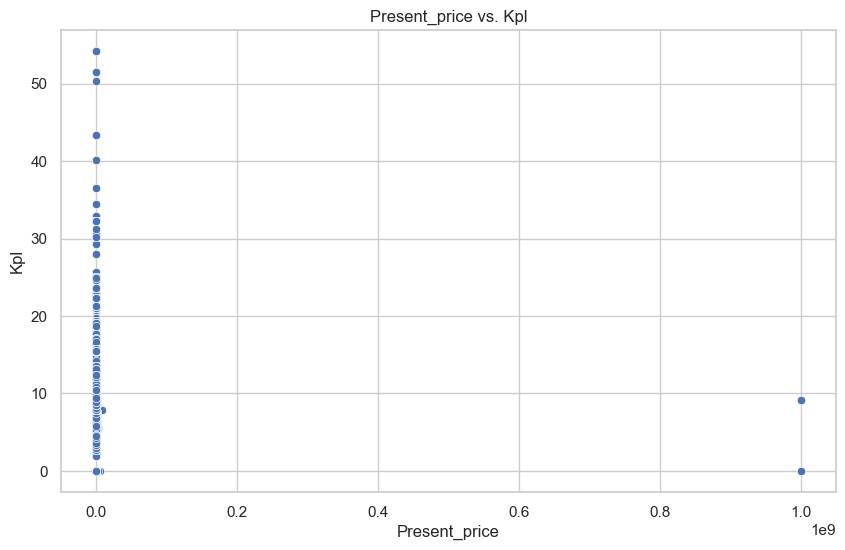

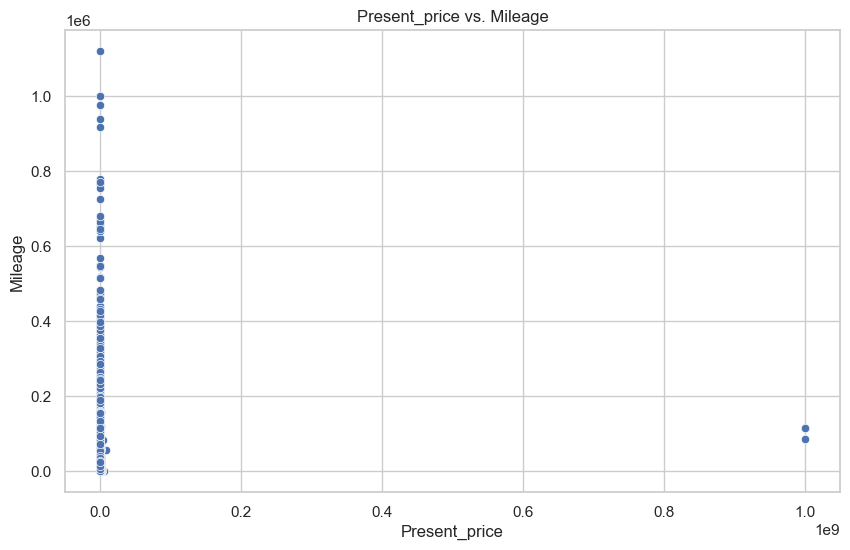

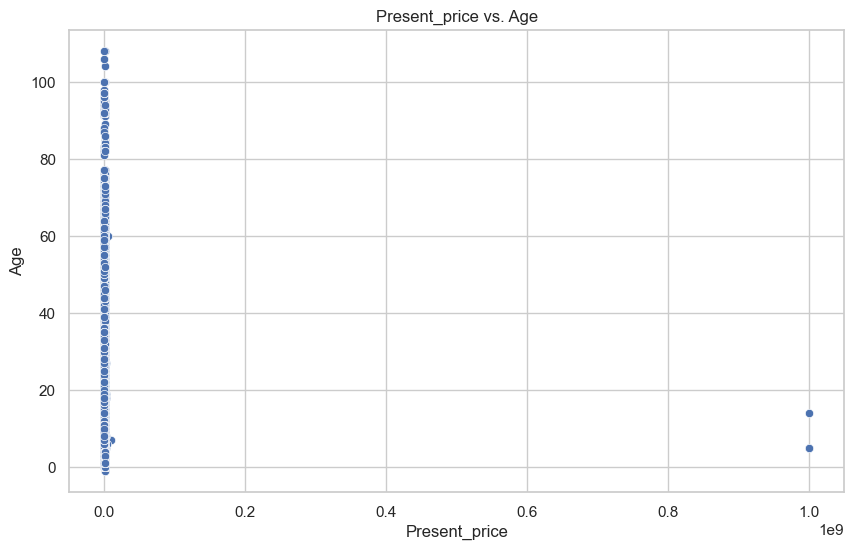

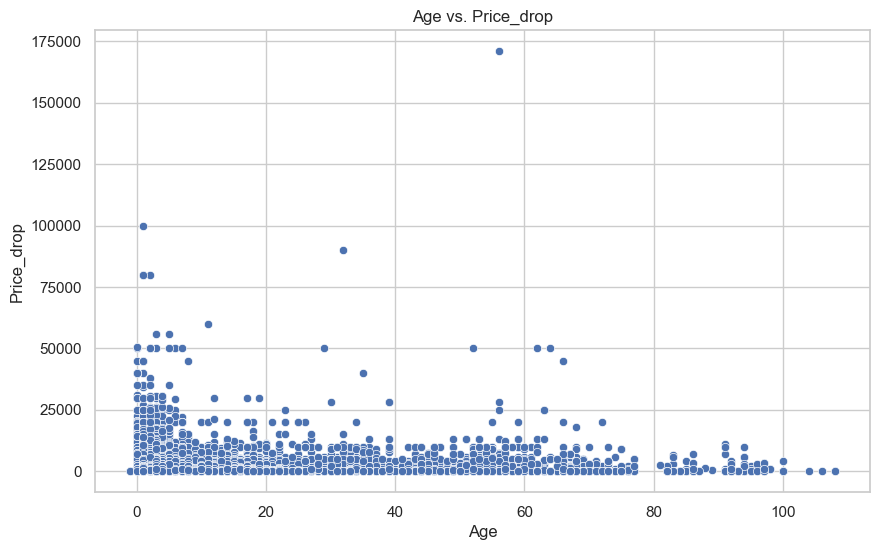

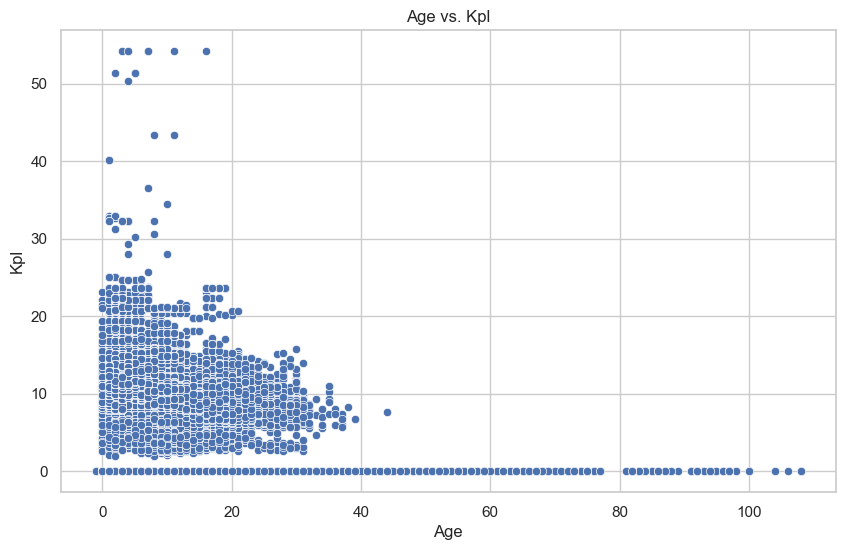

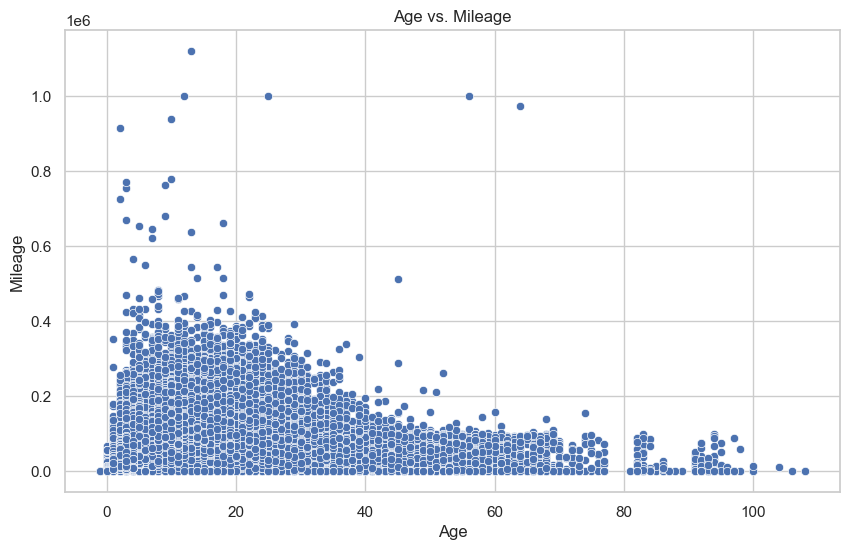

In [34]:
# Set style
sns.set(style="whitegrid")

# Create a scatter plot for present_price vs. price_drop
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_encoded, x='present_price', y='price_drop')
plt.title("Present Price vs. Price Drop")
plt.xlabel("Present Price")
plt.ylabel("Price Drop")
plt.show()

# Create scatter plots for other combinations
combinations = [('present_price', 'kpl'), ('present_price', 'mileage'), ('present_price', 'age'),
                ('age', 'price_drop'), ('age', 'kpl'), ('age', 'mileage')]

for x, y in combinations:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df_encoded, x=x, y=y)
    plt.title(f"{x.capitalize()} vs. {y.capitalize()}")
    plt.xlabel(x.capitalize())
    plt.ylabel(y.capitalize())
    plt.show()


In [35]:
df_encoded.age.unique()

array([ 10,   9,  30,   3,  32,   6,  22,  25,  28,   5,   1,   2,  24,
        19,   4,  31,  29,  23,  27,  18,  21,  13,  11,  12,   7,   8,
        17,  20,  35,  34,  33,   0,  26,  15,  14,  16,  36,  37,  39,
        38,  49,  47,  44,  46,  63,  62,  54,  52,  53,  56,  64,  45,
        43,  40,  51,  41,  58,  50,  60,  69,  68,  67,  70,  75,  83,
        72,  55,  59,  65,  84,  74,  82,  85, 104,  48,  57,  42,  61,
        66,  76,  92,  71,  77,  91,  86,  73,  87,  89,  97,  98,  88,
        93,  94,  95,  96, 100, 106, 108,  81,  -1])

In [36]:
rows_with_negative_age = df_encoded[df_encoded['age'] == -1]
print(rows_with_negative_age)

       manufacturer                         model produced_year  mileage  \
499506        Mazda  CX-90 3.3 Turbo Premium Plus          2024      1.0   
499507        Mazda          CX-90 S Premium Plus          2024      1.0   

               engine       transmission       drivetrain fuel_type  kpl  \
499506  3.3L I6 Turbo  8-Speed Automatic  All-wheel Drive  Gasoline  0.0   
499507           3.3L  8-Speed Automatic  All-wheel Drive  Gasoline  0.0   

              exterior_color  ... one_owner personal_use_only seller_name  \
499506                   51K  ...   Unknown               1.0   Cox Mazda   
499507  Artisan Red Metallic  ...   Unknown               1.0   Cox Mazda   

       seller_rating driver_rating driver_reviews_num price_drop    price  \
499506           3.2       Unknown                0.0        0.0  54920.0   
499507           3.2       Unknown                0.0        0.0  61920.0   

        age  present_price  
499506   -1        54920.0  
499507   -1        6

In [37]:
df_encoded = df_encoded[df_encoded['age'] != -1]
df_encoded.age.unique()

array([ 10,   9,  30,   3,  32,   6,  22,  25,  28,   5,   1,   2,  24,
        19,   4,  31,  29,  23,  27,  18,  21,  13,  11,  12,   7,   8,
        17,  20,  35,  34,  33,   0,  26,  15,  14,  16,  36,  37,  39,
        38,  49,  47,  44,  46,  63,  62,  54,  52,  53,  56,  64,  45,
        43,  40,  51,  41,  58,  50,  60,  69,  68,  67,  70,  75,  83,
        72,  55,  59,  65,  84,  74,  82,  85, 104,  48,  57,  42,  61,
        66,  76,  92,  71,  77,  91,  86,  73,  87,  89,  97,  98,  88,
        93,  94,  95,  96, 100, 106, 108,  81])

In [38]:
specific_years = ['1915', '1917', '1919', '1923', '1925', '1926', '1927', '1928', '1929', '1930',
                  '1931', '1932', '1934', '1935', '1936', '1937', '1938', '1939', '1940', '1941',
                  '1942', '1946', '1947', '1948']

rows_with_specific_years = df_encoded[df_encoded['produced_year'].isin(specific_years)]
print(rows_with_specific_years)

       manufacturer          model produced_year  mileage             engine  \
76450         Buick          Super          1948   1095.0                 V8   
76451         Buick          Super          1940   8106.0            Unknown   
76635         Buick  Special Coupe          1939   5126.0  350 Chevrolet  V8   
76637         Buick        Special          1941  83308.0         Straight 8   
76640         Buick  Special Coupe          1938   2402.0   Chevy 350 cid V8   
...             ...            ...           ...      ...                ...   
494606      Lincoln    Continental          1942      0.0            Unknown   
494697      Lincoln    Continental          1948   8403.0         292 ci V12   
494701      Lincoln    Continental          1941    407.0               4.8L   
494725      Lincoln    Continental          1948  49052.0          351 CI V8   
494824      Lincoln    Continental          1948  76211.0                V12   

                  transmission        d

In [41]:
print('The best fuel efficiency score is ' + str(rows_with_specific_years.kpl.max()))
print('The oldest age is ' + str(rows_with_specific_years.age.max()))
print('The yongest age is ' + str(rows_with_specific_years.age.min()))
print('The most expensive classic car between 1915 to 1948 is ' + str(rows_with_specific_years.age.max()))
print('The most cheapest classic car between 1915 to 1948 is ' + str(rows_with_specific_years.age.min()))

The best fuel efficiency score is 0.0
The oldest age is 108
The yongest age is 75
The most expensive classic car between 1915 to 1948 is 108
The most cheapest classic car between 1915 to 1948 is 75


1915         2
1917         1
1919         1
1923         4
1925         2
         ...  
2019    105934
2020    133589
2021    108894
2022     80714
2023     18218
Name: produced_year, Length: 99, dtype: int64


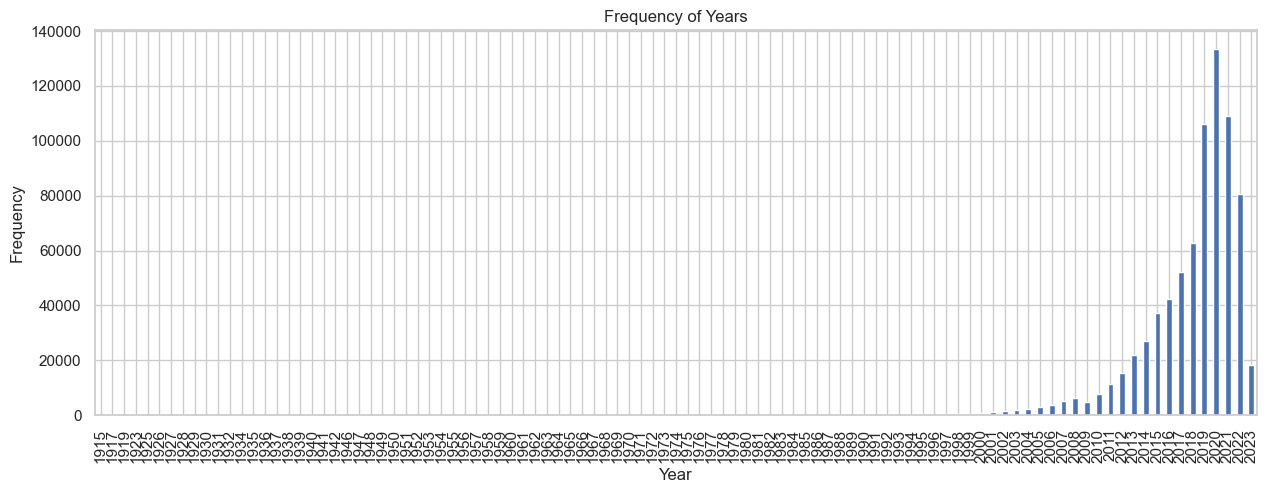

In [46]:
year_frequency = df_encoded['produced_year'].value_counts().sort_index()
print(year_frequency)

# Create a bar plot for year frequency
plt.figure(figsize=(15, 5))
year_frequency.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Frequency of Years')
plt.show()

Note that the frequency of years visualized does not refer to a time series explaining changes over time, as the visualization only represents when the car was produced. It does not indicate changes over time.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")

# Example for 'year' with adjusted bin count
sns.histplot(data=df, x='year', kde=True, color='skyblue', bins=30)  # Adjust the bin count here
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Distribution of Produced Year')

plt.show()

In [ ]:
fuel_type = cars_data_usa_cleaned['fuel_type']
mpg = encoded_data['mpg']

# Define colors for each fuel type
fuel_type_colors = {
    'Hybrid': 'red',
    'Gasoline': 'blue',
    'Gasoline/Mild Electric Hybrid': 'green',
    'Diesel': 'purple',
    'E85 Flex Fuel': 'orange',
    'Flexible Fuel': 'cyan',
    'Compressed Natural Gas': 'brown',
    'Gasoline Fuel': 'gray',
    'Hydrogen Fuel Cell': 'pink',
    'Plug-In Hybrid': 'yellow'
}

# Create a list of colors for each data point based on fuel type
colors = [fuel_type_colors.get(fuel, 'black') for fuel in fuel_type]

# Create scatter plot with different colors for each fuel type
plt.scatter(fuel_type, mpg, color=colors)

# Customize plot
plt.title('Fuel Type vs. MPG')
plt.xlabel('Fuel Type')
plt.ylabel('MPG')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Display plot
plt.show()
